In [128]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import sklearn.compose
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from scipy.sparse import csr_matrix, issparse
from category_encoders.binary import BinaryEncoder
from sklearn.model_selection import train_test_split
import pickle

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,e,e,f,a,NaN,w,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,p,i,n,t,e,NaN,p,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u


In [4]:
df.shape

(3116945, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [6]:
df.describe()

,id,cap-diameter,stem-height,stem-width
count,3.116945e+06,3.116941e+06,3.116945e+06,3.116945e+06
mean,1.558472e+06,6.309848e+00,6.348333e+00,1.115379e+01
std,8.997847e+05,4.657931e+00,2.699755e+00,8.095477e+00
min,0.000000e+00,3.000000e-02,0.000000e+00,0.000000e+00
25%,7.792360e+05,3.320000e+00,4.670000e+00,4.970000e+00
50%,1.558472e+06,5.750000e+00,5.880000e+00,9.650000e+00
75%,2.337708e+06,8.240000e+00,7.410000e+00,1.563000e+01
max,3.116944e+06,8.067000e+01,8.872000e+01,1.029000e+02


In [7]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
3116940    False
3116941    False
3116942    False
3116943    False
3116944    False
Length: 3116945, dtype: bool

In [8]:
df.isnull().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

<Axes: >

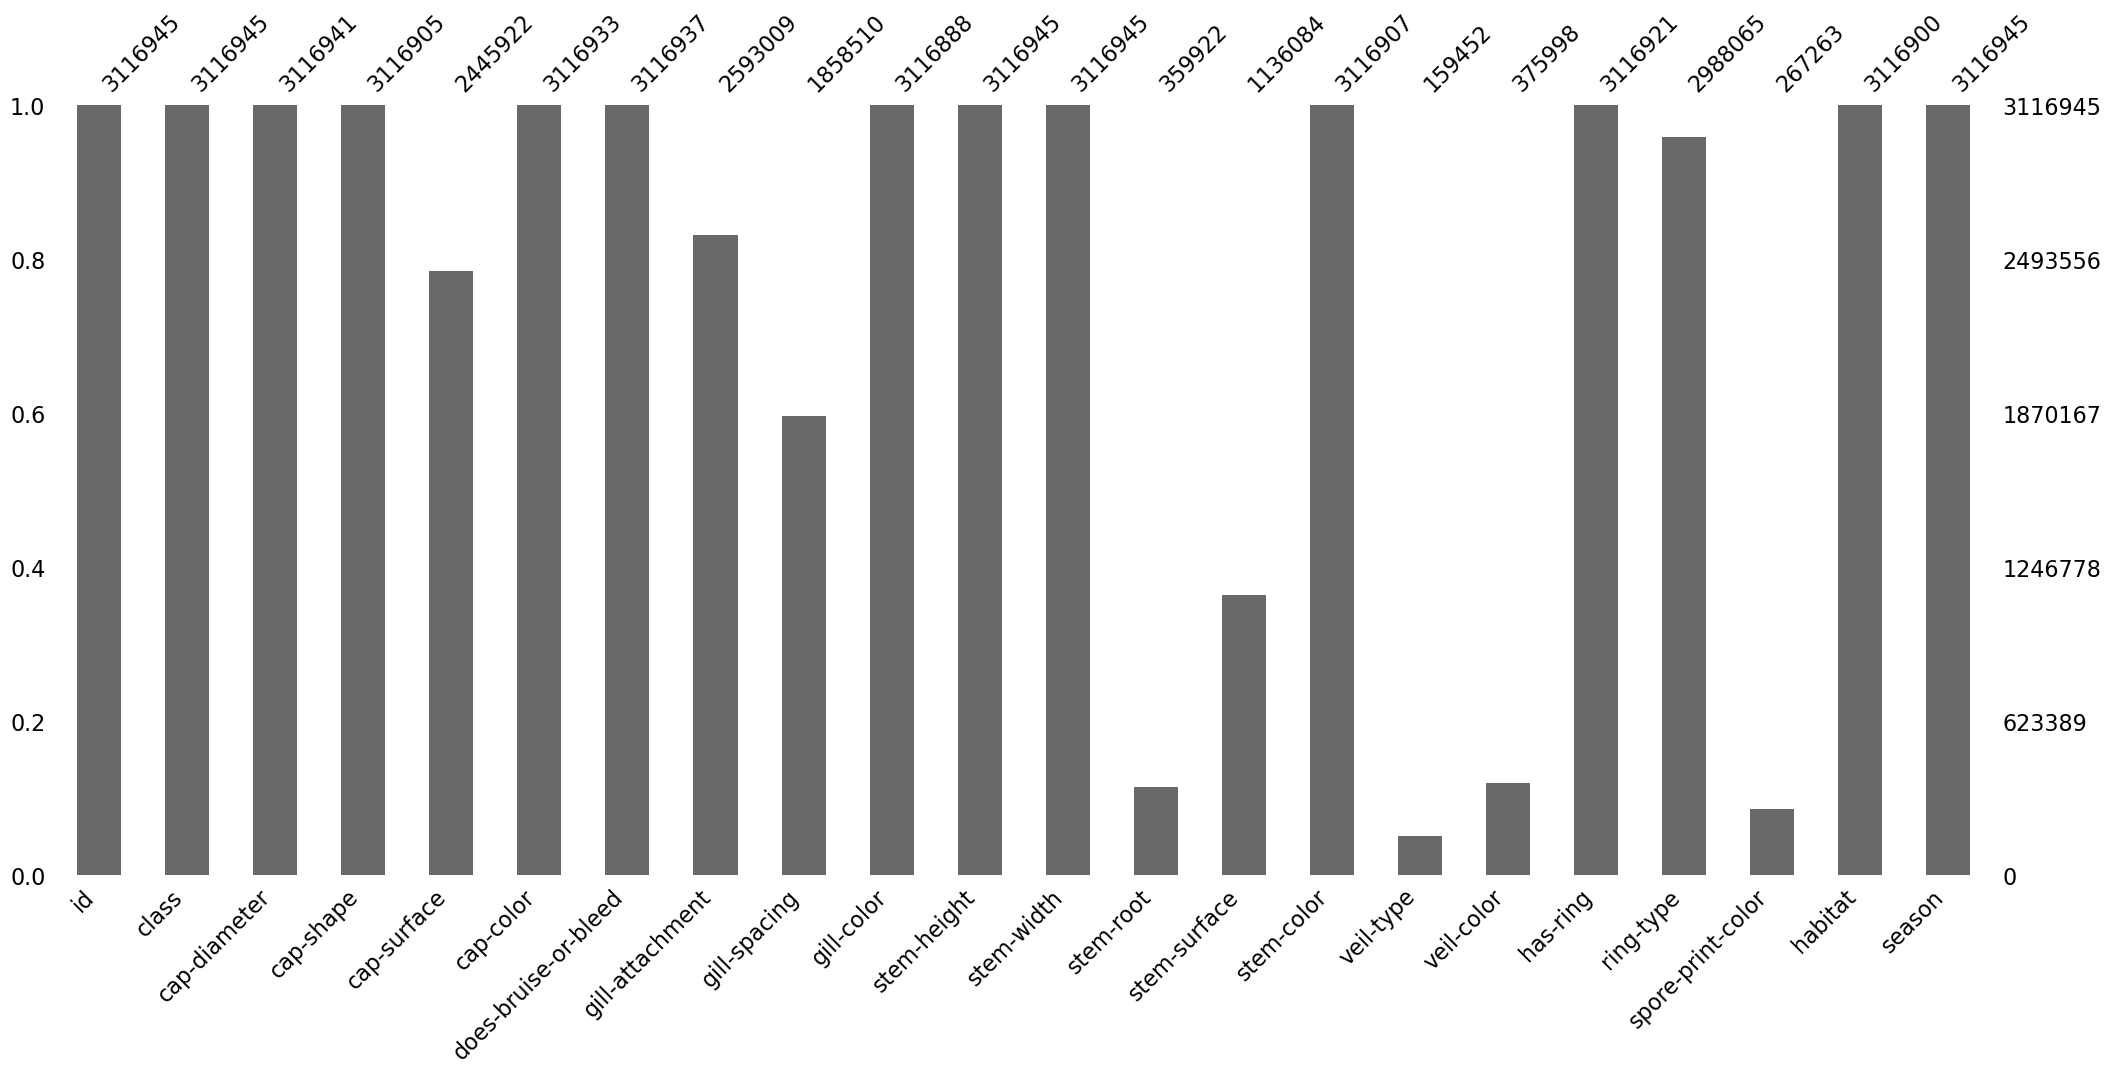

In [9]:
msno.bar(df)

In [10]:
le = LabelEncoder()

In [11]:
df['class_le'] = le.fit_transform(df['class'])

In [12]:
df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class_le
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,w,NaN,NaN,f,f,NaN,d,a,0
1,1,p,4.51,x,h,o,f,a,c,n,...,y,o,NaN,NaN,t,z,NaN,d,w,1
2,2,e,6.94,f,s,b,f,x,c,w,...,s,n,NaN,NaN,f,f,NaN,l,w,0
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,w,NaN,NaN,f,f,NaN,d,u,0
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,w,NaN,NaN,f,f,NaN,g,a,0


In [13]:
df1 = df.drop('class', axis = 1)

In [14]:
df1.head(5)

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class_le
0,0,8.80,f,s,u,f,a,c,w,4.51,...,NaN,w,NaN,NaN,f,f,NaN,d,a,0
1,1,4.51,x,h,o,f,a,c,n,4.79,...,y,o,NaN,NaN,t,z,NaN,d,w,1
2,2,6.94,f,s,b,f,x,c,w,6.85,...,s,n,NaN,NaN,f,f,NaN,l,w,0
3,3,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,w,NaN,NaN,f,f,NaN,d,u,0
4,4,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,w,NaN,NaN,f,f,NaN,g,a,0


In [15]:
df1 = df1.drop(columns = ['stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color'])

In [16]:
df1.shape

(3116945, 17)

In [17]:
df1['cap-diameter'] = df1['cap-diameter'].fillna(df1['cap-diameter'].mean())

In [18]:
df1['cap-diameter'].max()

80.67

In [19]:
df1.groupby(['cap-diameter'], as_index = False)[['id']].count()

,cap-diameter,id
0,0.03,1
1,0.10,1
2,0.30,1
3,0.38,1
4,0.40,6
...,...,...
3909,62.06,1
3910,62.30,1
3911,62.40,1
3912,64.46,1


In [20]:
df1['cap-diameter'] = df1['cap-diameter'].replace({80.67: 73.76})

In [21]:
df1['cap-diameter'].max()

73.76

In [22]:
stats_g_a= df1.groupby(['gill-attachment'], as_index = False)[['id']].count()
stats_g_a = stats_g_a.rename(columns = {'id': 'count'})
stats_g_a.sort_values(by = 'count', ascending=False)

,gill-attachment,count
44,a,646034
47,d,589236
75,x,360878
52,e,301858
70,s,295439
...,...,...
26,3.71,1
24,28.7,1
23,28.15,1
22,20.07,1


In [23]:
df1['gill-attachment'].unique()

array(['a', 'x', 's', 'd', 'e', nan, 'f', 'p', 'l', 'm', 'b', '32.54',
       'n', 'g', 'i', 'u', 'does-bruise-or-bleed', 't', 'o', 'c', 'w',
       '4.64', 'k', 'r', '4.77', 'h', 'p p', '7.92', 'z', 'season', 'y',
       '8.79', 'does None', 'has f', 'ring-type', '16.33', '10.85',
       '20.07', '2.82', '7.86', '3.91', 'does', '10.23', '6.74', '0.92',
       '3.45', '1', 'is a', '3.71', '50.44', '11.62', 'has d', '1.32',
       '8.47', '6.11', '2.41', '2.54', '6.32', '19.65', '15.49', '4.01',
       '8.37', 'does f', '28.7', '13.15', '1.37', '28.15', '7.09', '9.88',
       '2.67', '18.21', '1.48', '5.93', '1.51', '16.27', '11.26', '2.79',
       'is f', '13.94'], dtype=object)

In [24]:
df1['gill-attachment'] = df1['gill-attachment'].fillna('a')

In [25]:
def gill_attachment(df):
    df1['gill_attachment'] = 'a'
    
    gill_att = ['a', 's', 'p', 'x', 'f', 'd', 'e', 'c', 't', 'i', 'u',
       'k', 'n', 'w', 'm', 'z', 'l', 'b', 'o','g','r','y', 'h',]
    
    for gill in gill_att:
        df1.loc[df1['gill-attachment'] == gill, 'gill_attachment'] = gill
    return df

In [26]:
gill_attachment(df1)

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,class_le,gill_attachment
0,0,8.80,f,s,u,f,a,c,w,4.51,15.39,w,f,f,d,a,0,a
1,1,4.51,x,h,o,f,a,c,n,4.79,6.48,o,t,z,d,w,1,a
2,2,6.94,f,s,b,f,x,c,w,6.85,9.93,n,f,f,l,w,0,x
3,3,3.88,f,y,g,f,s,NaN,g,4.16,6.53,w,f,f,d,u,0,s
4,4,5.85,x,l,w,f,d,NaN,w,3.37,8.36,w,f,f,g,a,0,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,9.29,f,NaN,n,t,a,NaN,w,12.14,18.81,w,t,g,d,u,0,a
3116941,3116941,10.88,s,NaN,w,t,d,c,p,6.65,26.97,w,f,f,d,u,0,d
3116942,3116942,7.82,x,e,e,f,a,NaN,w,9.51,11.06,y,t,z,d,a,1,a
3116943,3116943,9.45,p,i,n,t,e,NaN,p,9.13,17.77,w,t,p,d,u,0,e


In [27]:
df1['gill_attachment'].unique()

array(['a', 'x', 's', 'd', 'e', 'f', 'p', 'l', 'm', 'b', 'n', 'g', 'i',
       'u', 't', 'o', 'c', 'w', 'k', 'r', 'h', 'z', 'y'], dtype=object)

In [28]:
df2=df1.copy()

In [29]:
stats_c_s = df2.groupby(['cap-surface'], as_index = False)[['id']].count()
stats_c_s = stats_c_s.rename(columns = {'id': 'count'})
stats_c_s.sort_values(by = 'count', ascending=False)

,cap-surface,count
76,t,460777
72,s,384970
81,y,327826
56,h,284460
55,g,263729
...,...,...
26,3.64,1
25,3.33,1
24,3.06,1
23,24.38,1


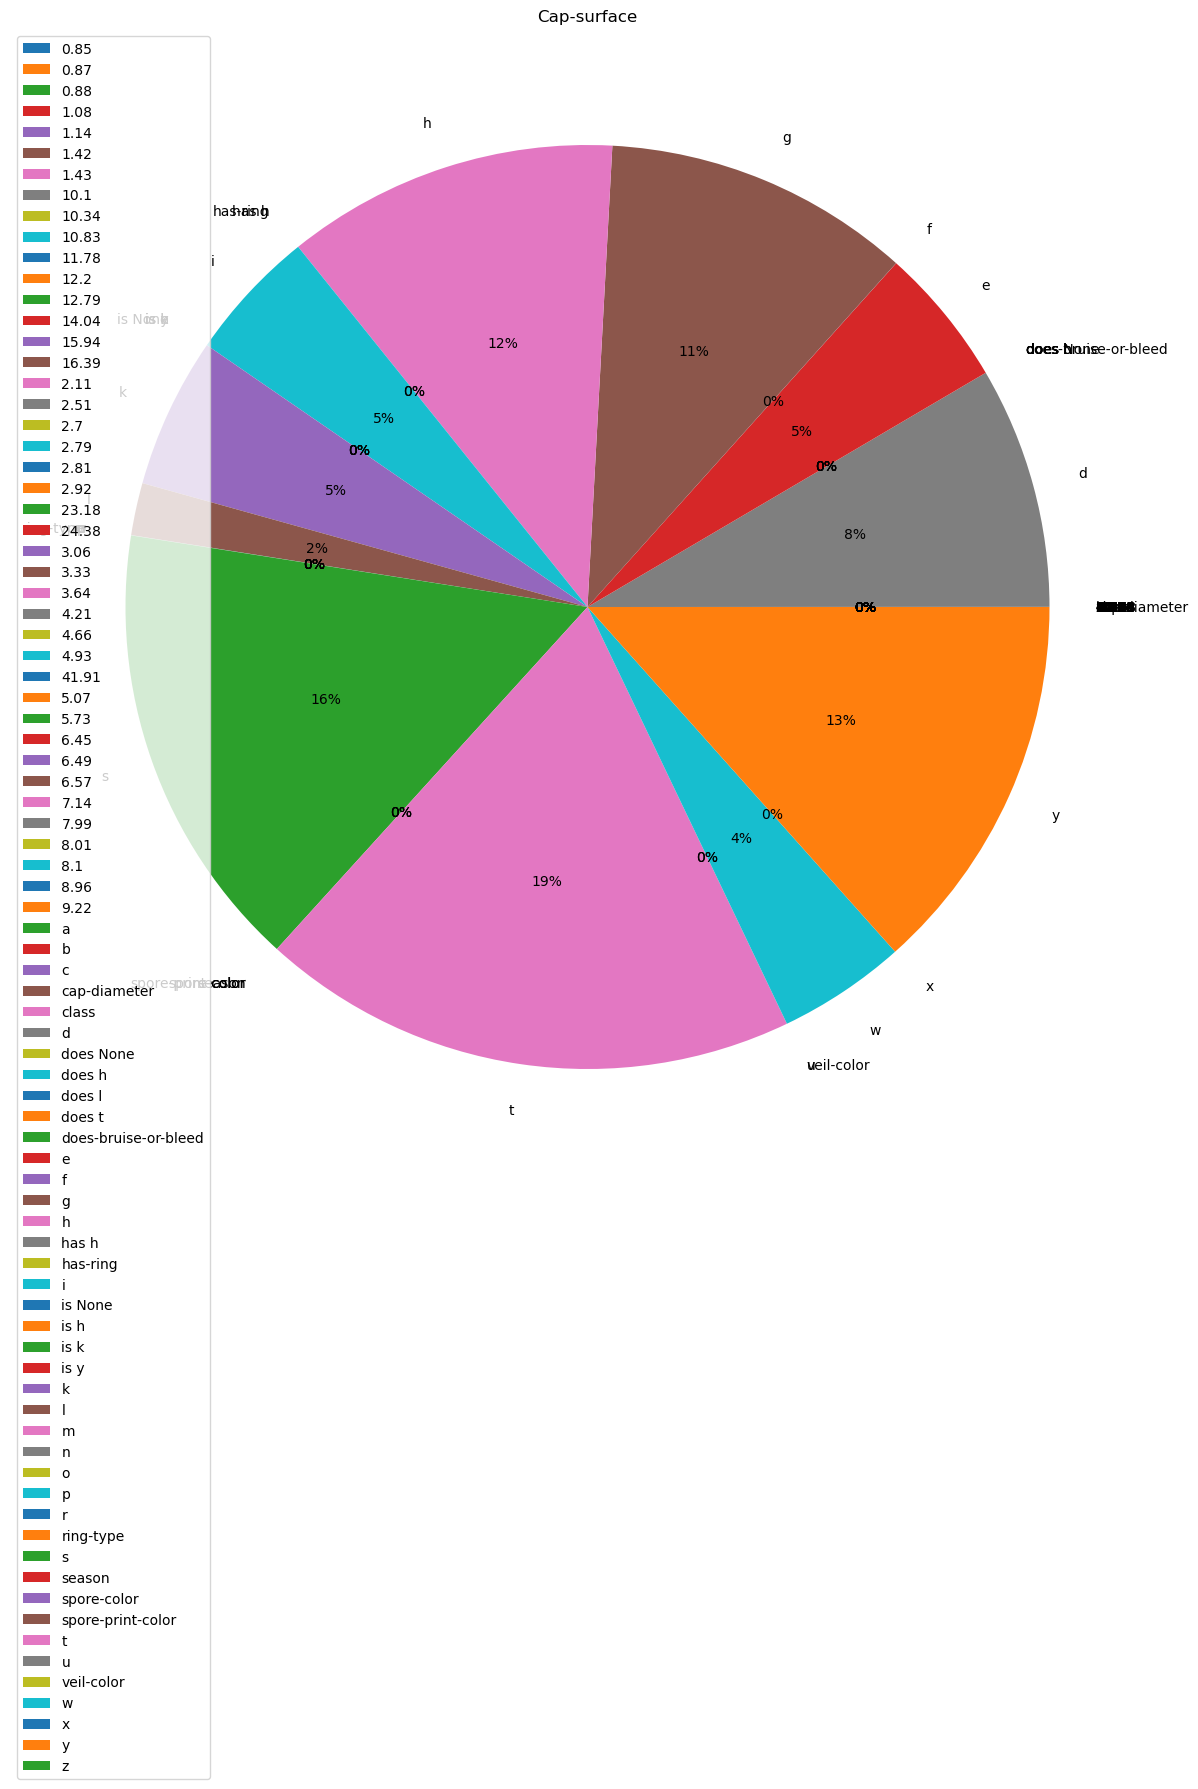

In [30]:
plt.figure(figsize=(24, 15))
plt.pie(stats_c_s['count'], labels=stats_c_s['cap-surface'], autopct='%1.0f%%')
plt.title('Cap-surface')
plt.legend()

plt.show()

In [31]:
df2['cap-surface'] = df2['cap-surface'].fillna('t')

In [32]:
df2['cap-surface'].unique()

array(['s', 'h', 'y', 'l', 't', 'e', 'g', 'd', 'i', 'w', 'k', '15.94',
       'f', 'n', 'r', 'o', 'a', 'u', 'z', '2.7', 'does l', '5.07', 'p',
       'b', 'm', 'cap-diameter', '1.43', 'x', '7.14', 'c', 'is h',
       'does t', '0.85', '6.57', '12.79', '6.45', '4.66', '23.18', '3.06',
       '16.39', '4.21', 'veil-color', '11.78', '8.1', 'has-ring',
       'does h', '1.42', 'class', 'has h', 'does None', '10.83', 'season',
       '8.96', '14.04', '5.73', 'is None', '24.38', '2.81', '0.88',
       '2.11', '2.79', 'ring-type', 'does-bruise-or-bleed', '4.93',
       'spore-print-color', 'spore-color', '2.92', '2.51', '7.99', 'is y',
       '3.64', '3.33', '41.91', '12.2', '8.01', '9.22', '1.14', '6.49',
       '10.34', '10.1', '1.08', 'is k', '0.87'], dtype=object)

In [33]:
def cap_surface(df):
    df2['cap_surface'] = 't'
    
    cap_s = ['t', 'g', 'h', 'd', 'e', 'y', 'k', 's', 'i', 'l', 'w', 'r', 'f',
       'o', 'm', 'a', 'n', 'p', 'b', 'x', 'u', 'z', 'c']
    for cap in cap_s:
        df2.loc[df2['cap-surface'] == cap, 'cap_surface'] = cap
    return df

In [34]:
cap_surface(df2)

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,class_le,gill_attachment,cap_surface
0,0,8.80,f,s,u,f,a,c,w,4.51,15.39,w,f,f,d,a,0,a,s
1,1,4.51,x,h,o,f,a,c,n,4.79,6.48,o,t,z,d,w,1,a,h
2,2,6.94,f,s,b,f,x,c,w,6.85,9.93,n,f,f,l,w,0,x,s
3,3,3.88,f,y,g,f,s,NaN,g,4.16,6.53,w,f,f,d,u,0,s,y
4,4,5.85,x,l,w,f,d,NaN,w,3.37,8.36,w,f,f,g,a,0,d,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,9.29,f,t,n,t,a,NaN,w,12.14,18.81,w,t,g,d,u,0,a,t
3116941,3116941,10.88,s,t,w,t,d,c,p,6.65,26.97,w,f,f,d,u,0,d,t
3116942,3116942,7.82,x,e,e,f,a,NaN,w,9.51,11.06,y,t,z,d,a,1,a,e
3116943,3116943,9.45,p,i,n,t,e,NaN,p,9.13,17.77,w,t,p,d,u,0,e,i


In [35]:
df2['cap_surface'].unique()

array(['s', 'h', 'y', 'l', 't', 'e', 'g', 'd', 'i', 'w', 'k', 'f', 'n',
       'r', 'o', 'a', 'u', 'z', 'p', 'b', 'm', 'x', 'c'], dtype=object)

In [36]:
df2.shape

(3116945, 19)

<Axes: >

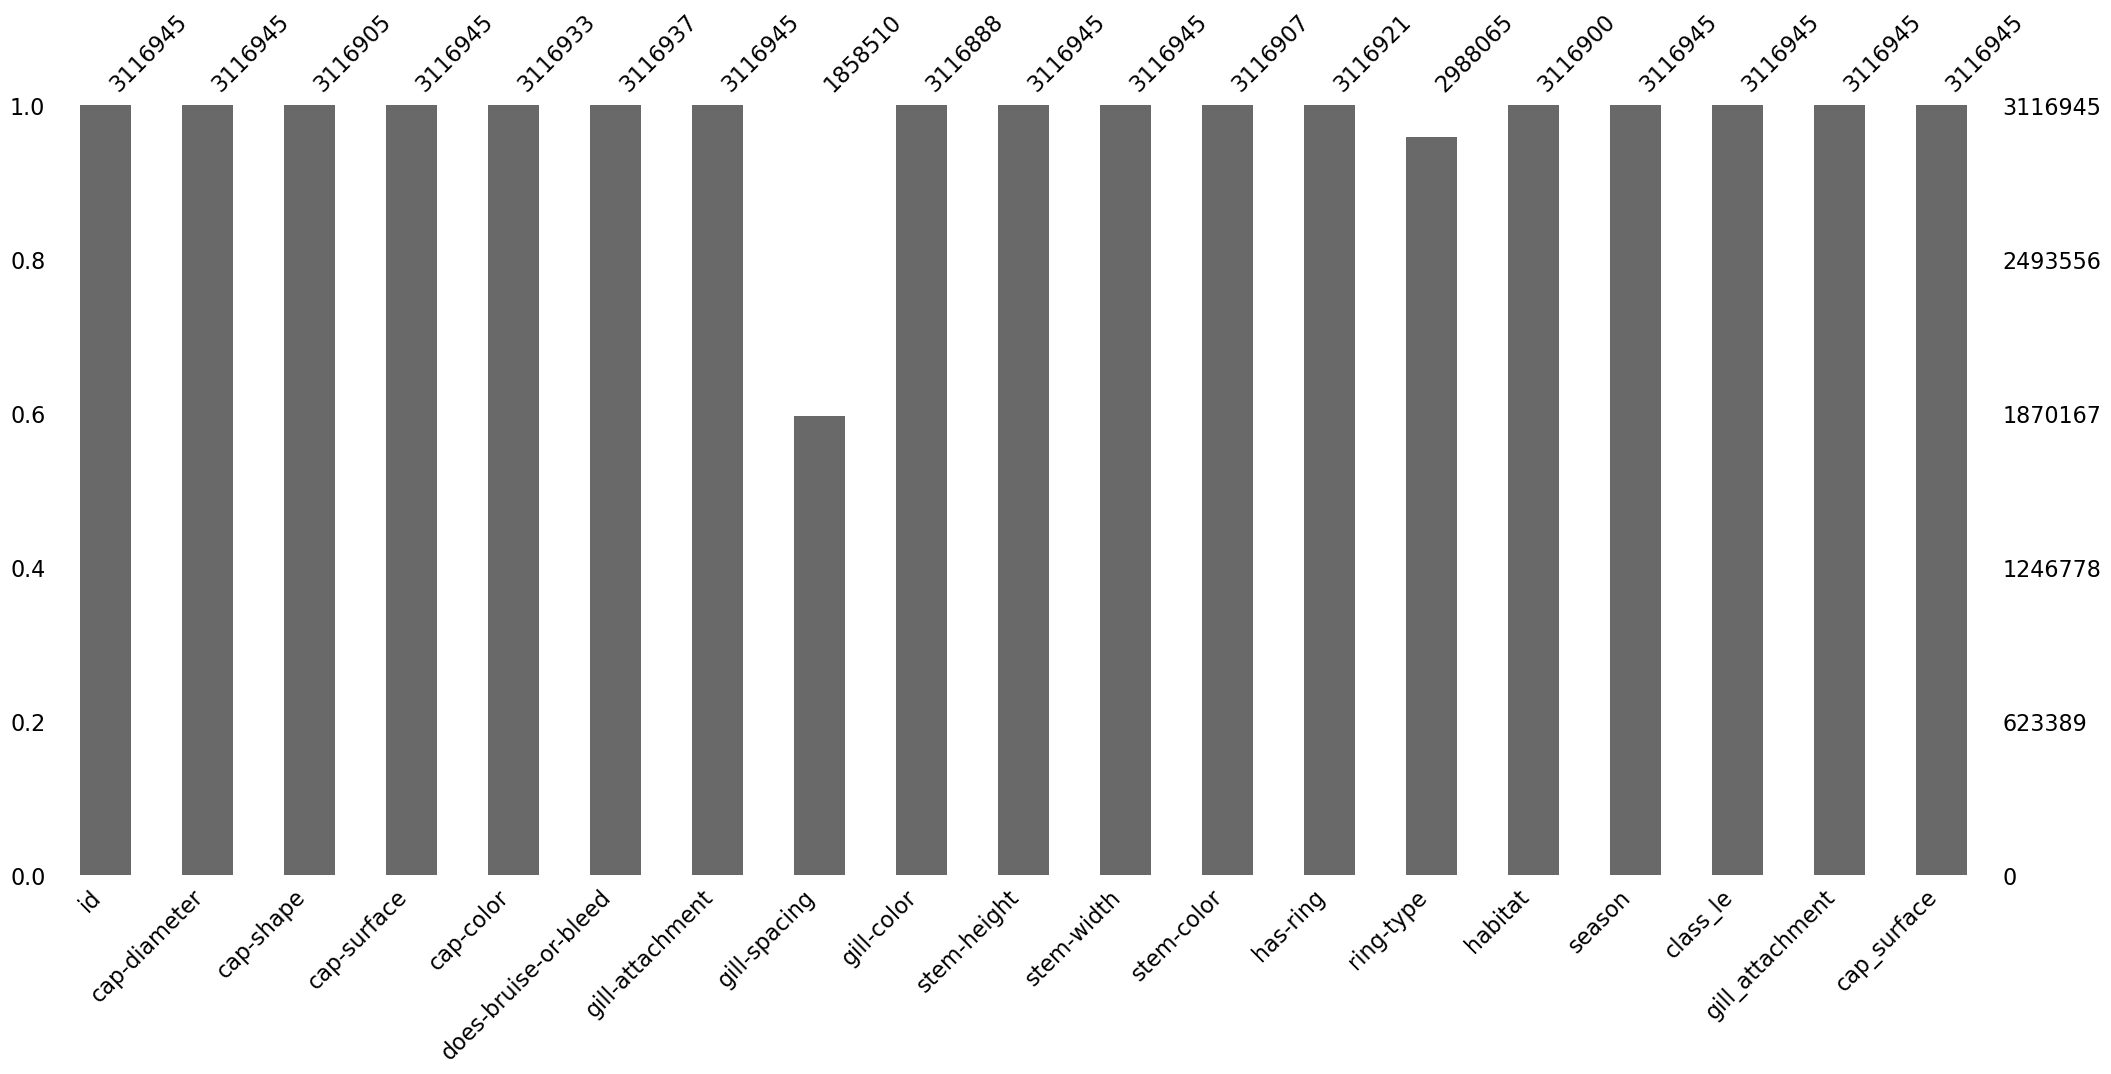

In [37]:
msno.bar(df2)

In [38]:
stats_c_sh = df2.groupby(['cap-shape'], as_index = False)[['id']].count()
stats_c_sh = stats_c_sh.rename(columns = {'id': 'count'})
stats_c_sh.sort_values(by = 'count', ascending=False)

,cap-shape,count
71,x,1436026
53,f,676238
67,s,365146
48,b,318646
63,o,108835
...,...,...
24,3.6,1
22,3.52,1
21,3.37,1
20,3.25,1


In [39]:
df2['cap-shape'] = df2['cap-shape'].fillna('x')

In [40]:
df2['cap-shape'].unique()

array(['f', 'x', 'p', 'b', 'o', 'c', 's', 'd', 'e', 'n', 'w', 'k', 'l',
       '19.29', '5 f', 't', 'g', 'z', 'a', '2.85', '7 x', 'r', 'u',
       '3.55', 'is s', 'y', '4.22', '3.6', '21.56', 'i', '6 x', '24.16',
       '8', 'm', 'ring-type', '10.13', 'is p', '7.43', 'h', '0.82',
       '10.46', '2.77', '2.94', '12.62', '5.15', '19.04', '4.97', '49.21',
       'b f', '9.13', '1.66', '3.37', '7.21', '3.25', '11.12', '3 x',
       '4.3', '7.41', '6.21', '8.29', '54.78', '20.25', '3.52', '3.04',
       '2.63', '3.91', '6.44', '8.3', '7.6', '17.44', '4.33', '2.82',
       '6.53', '19.06'], dtype=object)

In [41]:
def cap_shape(df):
    df2['cap_shape'] = 'x'
    
    cap_sh = ['t', 'g', 'h', 'd', 'e', 'y', 'k', 's', 'i', 'l', 'w', 'r', 'f',
       'o', 'm', 'a', 'n', 'p', 'b', 'x', 'u', 'z', 'c']
    for caps in cap_sh:
        df2.loc[df2['cap-shape'] == caps, 'cap_shape'] = caps
    return df

In [42]:
cap_shape(df2)

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,class_le,gill_attachment,cap_surface,cap_shape
0,0,8.80,f,s,u,f,a,c,w,4.51,15.39,w,f,f,d,a,0,a,s,f
1,1,4.51,x,h,o,f,a,c,n,4.79,6.48,o,t,z,d,w,1,a,h,x
2,2,6.94,f,s,b,f,x,c,w,6.85,9.93,n,f,f,l,w,0,x,s,f
3,3,3.88,f,y,g,f,s,NaN,g,4.16,6.53,w,f,f,d,u,0,s,y,f
4,4,5.85,x,l,w,f,d,NaN,w,3.37,8.36,w,f,f,g,a,0,d,l,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,9.29,f,t,n,t,a,NaN,w,12.14,18.81,w,t,g,d,u,0,a,t,f
3116941,3116941,10.88,s,t,w,t,d,c,p,6.65,26.97,w,f,f,d,u,0,d,t,s
3116942,3116942,7.82,x,e,e,f,a,NaN,w,9.51,11.06,y,t,z,d,a,1,a,e,x
3116943,3116943,9.45,p,i,n,t,e,NaN,p,9.13,17.77,w,t,p,d,u,0,e,i,p


In [43]:
df2['cap_shape'].unique()

array(['f', 'x', 'p', 'b', 'o', 'c', 's', 'd', 'e', 'n', 'w', 'k', 'l',
       't', 'g', 'z', 'a', 'r', 'u', 'y', 'i', 'm', 'h'], dtype=object)

In [44]:
df3 = df2.copy()

In [45]:
stats_c_c = df3.groupby(['cap-color'], as_index = False)[['id']].count()
stats_c_c = stats_c_c.rename(columns = {'id': 'count'})
stats_c_c.sort_values(by = 'count', ascending=False)

,cap-color,count
63,n,1359542
76,y,386627
74,w,379442
57,g,210825
55,e,197290
...,...,...
26,3.57,1
24,3.11,1
23,3.08,1
22,26.89,1


In [46]:
df3['cap-color'] = df3['cap-color'].fillna('n')

In [47]:
df3['cap-color'].unique()

array(['u', 'o', 'b', 'g', 'w', 'n', 'e', 'y', 'r', 'p', 'k', 'l', 'i',
       'h', 'd', 's', 'a', 'f', '2.05', 'season', 'c', 'x', '13', '7.72',
       'm', 'z', '6.76', '7.15', 't', 'ring-type', 'class', '12.89',
       '8.83', '24.75', '22.38', '1.51', '10.1', '17.94', '3.57',
       'does n', '4.89', '6.2', '21.53', '6.41', '4.98', '3.95',
       'does-bruise-or-bleed', '6.59', '5.25', 'veil-color', '6.9',
       '5.41', '11.13', '3.11', '2.57', '17.93', '2.7', '8.57', '11.92',
       '3.08', '2.82', '4.24', '17.19', '3.34', '7', '2.9', '6.36',
       '5.91', '10.56', '26.89', '4. n', '20.62', 'stem-surface', '20.02',
       '20', '25.98', '8.67', '9.02'], dtype=object)

In [48]:
def cap_color(df):
    df3['cap_color'] = 'n'
    
    cap_cl = ['n', 'o', 'y', 'k', 'b', 'w', 'e', 'g', 'p', 'u', 'l', 'r', 'z',
              'f', 's', 'd', 'i', 'a', 'x','c','t', 'h', 'm']
    for capc in cap_cl:
        df3.loc[df3['cap-color'] == capc, 'cap_color'] = capc
    return df

In [49]:
cap_color(df3)

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-color,has-ring,ring-type,habitat,season,class_le,gill_attachment,cap_surface,cap_shape,cap_color
0,0,8.80,f,s,u,f,a,c,w,4.51,...,w,f,f,d,a,0,a,s,f,u
1,1,4.51,x,h,o,f,a,c,n,4.79,...,o,t,z,d,w,1,a,h,x,o
2,2,6.94,f,s,b,f,x,c,w,6.85,...,n,f,f,l,w,0,x,s,f,b
3,3,3.88,f,y,g,f,s,NaN,g,4.16,...,w,f,f,d,u,0,s,y,f,g
4,4,5.85,x,l,w,f,d,NaN,w,3.37,...,w,f,f,g,a,0,d,l,x,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,9.29,f,t,n,t,a,NaN,w,12.14,...,w,t,g,d,u,0,a,t,f,n
3116941,3116941,10.88,s,t,w,t,d,c,p,6.65,...,w,f,f,d,u,0,d,t,s,w
3116942,3116942,7.82,x,e,e,f,a,NaN,w,9.51,...,y,t,z,d,a,1,a,e,x,e
3116943,3116943,9.45,p,i,n,t,e,NaN,p,9.13,...,w,t,p,d,u,0,e,i,p,n


In [50]:
df3['cap_color'].unique()

array(['u', 'o', 'b', 'g', 'w', 'n', 'e', 'y', 'r', 'p', 'k', 'l', 'i',
       'h', 'd', 's', 'a', 'f', 'c', 'x', 'm', 'z', 't'], dtype=object)

In [51]:
stats_d_b = df3.groupby(['does-bruise-or-bleed'], as_index = False)[['id']].count()
stats_d_b = stats_d_b.rename(columns = {'id': 'count'})
stats_d_b.sort_values(by = 'count', ascending=False)

,does-bruise-or-bleed,count
8,f,2569743
20,t,547085
22,w,14
5,c,11
10,h,9
24,y,7
3,a,7
4,b,7
23,x,7
13,k,6


In [52]:
df3['does-bruise-or-bleed'] = df3['does-bruise-or-bleed'].fillna('f')

In [53]:
df3['does-bruise-or-bleed'].unique()

array(['f', 't', 'd', 'has-ring', 'w', 'o', 'b', 'x', 'p', 'g', 'y', 'r',
       'a', 'l', 'i', 'c', 'n', 'z', 's', 'k', 'h', '3.43', 'e', '4.42',
       '2.9', 'u'], dtype=object)

In [54]:
def d_b_or_bleed(df):
    df3['does_bruise_or_bleed'] = 'f'
    
    d_b = ['t', 'f', 'c', 'k', 'x', 's', 'a', 'p',
              'n', 'o', 'w', 'b', 'i', 'e', 'r', 'l', 'y', 'm', 'g', 'h']
    for i in d_b:
        df3.loc[df3['does-bruise-or-bleed'] == i, 'does_bruise_or_bleed'] = i
    return df

In [55]:
d_b_or_bleed(df3)

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,has-ring,ring-type,habitat,season,class_le,gill_attachment,cap_surface,cap_shape,cap_color,does_bruise_or_bleed
0,0,8.80,f,s,u,f,a,c,w,4.51,...,f,f,d,a,0,a,s,f,u,f
1,1,4.51,x,h,o,f,a,c,n,4.79,...,t,z,d,w,1,a,h,x,o,f
2,2,6.94,f,s,b,f,x,c,w,6.85,...,f,f,l,w,0,x,s,f,b,f
3,3,3.88,f,y,g,f,s,NaN,g,4.16,...,f,f,d,u,0,s,y,f,g,f
4,4,5.85,x,l,w,f,d,NaN,w,3.37,...,f,f,g,a,0,d,l,x,w,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,9.29,f,t,n,t,a,NaN,w,12.14,...,t,g,d,u,0,a,t,f,n,t
3116941,3116941,10.88,s,t,w,t,d,c,p,6.65,...,f,f,d,u,0,d,t,s,w,t
3116942,3116942,7.82,x,e,e,f,a,NaN,w,9.51,...,t,z,d,a,1,a,e,x,e,f
3116943,3116943,9.45,p,i,n,t,e,NaN,p,9.13,...,t,p,d,u,0,e,i,p,n,t


In [56]:
df3['does_bruise_or_bleed'].unique()

array(['f', 't', 'w', 'o', 'b', 'x', 'p', 'g', 'y', 'r', 'a', 'l', 'i',
       'c', 'n', 's', 'k', 'h', 'e'], dtype=object)

In [57]:
df4 = df3.copy()

In [58]:
df4['gill-spacing'].unique()

array(['c', nan, 'd', 'f', 'x', 'b', 'a', '3.61', '2.69', 'k', '4.8', 'e',
       'y', 'class', 's', '9.01', 'p', '3.92', '5.22', '6.67', '4.04',
       't', '0.73', 'i', '3.57', '24.38', 'w', 'h', 'cap-surface', 'l',
       '1', '12.27', '5.42', 'r', '1.6', 'n', 'g', '0', '3.81', '4.09',
       '1.36', '3.24', '5.55', '5.7', '3.62', 'does f', '6.4', '1.88',
       '55.13'], dtype=object)

In [59]:
stats_g_s = df4.groupby(['gill-spacing'], as_index = False)[['id']].count()
stats_g_s = stats_g_s.rename(columns = {'id': 'count'})
stats_g_s.sort_values(by = 'count', ascending=False)

,gill-spacing,count
28,c,1331054
31,d,407932
34,f,119380
33,e,24
26,a,17
43,s,16
27,b,12
46,x,8
44,t,8
41,p,7


In [60]:
df4['gill-spacing'] = df4['gill-spacing'].fillna('c')

In [61]:
def gill_spacing(df):
    df4['gill_spacing'] = 'c'
    
    gill_s = ['c', 'f', 'd', 's', 'e', 'a', 'y', 'm', 'w', 'b', 'g', 'p', 'x', 
              'r', 't', 'i', 'k']
    for gills in  gill_s:
        df4.loc[df4['gill-spacing'] == gills, 'gill_spacing'] = gills
    return df

In [62]:
gill_spacing(df4)

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,ring-type,habitat,season,class_le,gill_attachment,cap_surface,cap_shape,cap_color,does_bruise_or_bleed,gill_spacing
0,0,8.80,f,s,u,f,a,c,w,4.51,...,f,d,a,0,a,s,f,u,f,c
1,1,4.51,x,h,o,f,a,c,n,4.79,...,z,d,w,1,a,h,x,o,f,c
2,2,6.94,f,s,b,f,x,c,w,6.85,...,f,l,w,0,x,s,f,b,f,c
3,3,3.88,f,y,g,f,s,c,g,4.16,...,f,d,u,0,s,y,f,g,f,c
4,4,5.85,x,l,w,f,d,c,w,3.37,...,f,g,a,0,d,l,x,w,f,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,9.29,f,t,n,t,a,c,w,12.14,...,g,d,u,0,a,t,f,n,t,c
3116941,3116941,10.88,s,t,w,t,d,c,p,6.65,...,f,d,u,0,d,t,s,w,t,c
3116942,3116942,7.82,x,e,e,f,a,c,w,9.51,...,z,d,a,1,a,e,x,e,f,c
3116943,3116943,9.45,p,i,n,t,e,c,p,9.13,...,p,d,u,0,e,i,p,n,t,c


In [63]:
df4['gill_spacing'].unique()

array(['c', 'd', 'f', 'x', 'b', 'a', 'k', 'e', 'y', 's', 'p', 't', 'i',
       'w', 'r', 'g'], dtype=object)

In [64]:
stats_g_c = df4.groupby(['gill-color'], as_index = False)[['id']].count()
stats_g_c = stats_g_c.rename(columns = {'id': 'count'})
stats_g_c.sort_values(by = 'count', ascending=False)

,gill-color,count
59,w,931538
46,n,543386
61,y,469464
48,p,343626
37,g,212164
...,...,...
24,8.83,1
25,9.46,1
1,1.91,1
32,does w,1


<Axes: xlabel='gill-color', ylabel='count'>

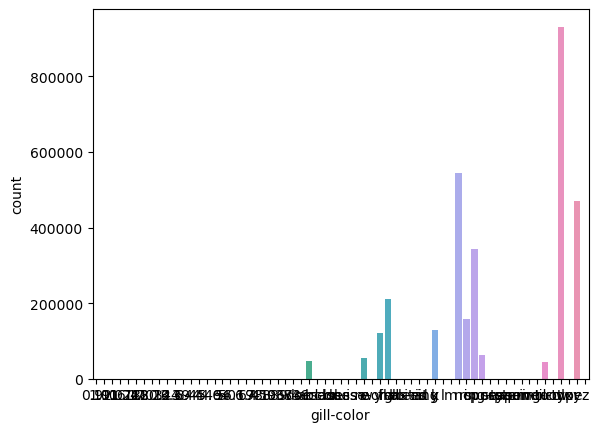

In [65]:
sns.barplot(stats_g_c, x = 'gill-color', y = 'count')

In [66]:
df4['gill-color'] = df4['gill-color'].fillna('w')

In [67]:
df4['gill-color'].unique()

array(['w', 'n', 'g', 'k', 'y', 'f', 'p', 'o', 'b', 'u', 'e', 'r', 'd',
       't', '3.45', 'z', '5', '3.39', 'season', 'h', 'x', 's', '4',
       'class', 'c', 'm', 'spacing', '0.92', '18.12', 'l', 'does w', 'a',
       '7.59', '8.06', '6.19', 'has-ring', '4.49', '9.46', '5.01',
       'ring-type', '3.4', 'i', '17', '10.07', 'stem-root', '20.6',
       'spore-print-color', '18.03', 'does-bruise-or-bleed', '8.83',
       'habitat', '10.21', '4.64', '6.4', 'is y', 'e y', '1.91', 'does n',
       '16.41', '6.41', 'veil-type', '20.44', '8.37'], dtype=object)

In [68]:
def gill_color(df):
    df4['gill_color'] = 'w'
    
    gill_c = ['w', 'y', 'n', 'e', 'f', 'b', 'g', 'p', 'o', 'u', 'k', 'r', 'l',
              'd', 'm', 't', 's', 'a', 'x', 'c', 'i', 'h', 'z']
    for gillc in  gill_c:
        df4.loc[df4['gill-color'] == gillc, 'gill_color'] = gillc
    return df

In [69]:
gill_color(df4)

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,habitat,season,class_le,gill_attachment,cap_surface,cap_shape,cap_color,does_bruise_or_bleed,gill_spacing,gill_color
0,0,8.80,f,s,u,f,a,c,w,4.51,...,d,a,0,a,s,f,u,f,c,w
1,1,4.51,x,h,o,f,a,c,n,4.79,...,d,w,1,a,h,x,o,f,c,n
2,2,6.94,f,s,b,f,x,c,w,6.85,...,l,w,0,x,s,f,b,f,c,w
3,3,3.88,f,y,g,f,s,c,g,4.16,...,d,u,0,s,y,f,g,f,c,g
4,4,5.85,x,l,w,f,d,c,w,3.37,...,g,a,0,d,l,x,w,f,c,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,9.29,f,t,n,t,a,c,w,12.14,...,d,u,0,a,t,f,n,t,c,w
3116941,3116941,10.88,s,t,w,t,d,c,p,6.65,...,d,u,0,d,t,s,w,t,c,p
3116942,3116942,7.82,x,e,e,f,a,c,w,9.51,...,d,a,1,a,e,x,e,f,c,w
3116943,3116943,9.45,p,i,n,t,e,c,p,9.13,...,d,u,0,e,i,p,n,t,c,p


In [70]:
df4['gill_color'].unique()

array(['w', 'n', 'g', 'k', 'y', 'f', 'p', 'o', 'b', 'u', 'e', 'r', 'd',
       't', 'z', 'h', 'x', 's', 'c', 'm', 'l', 'a', 'i'], dtype=object)

<Axes: >

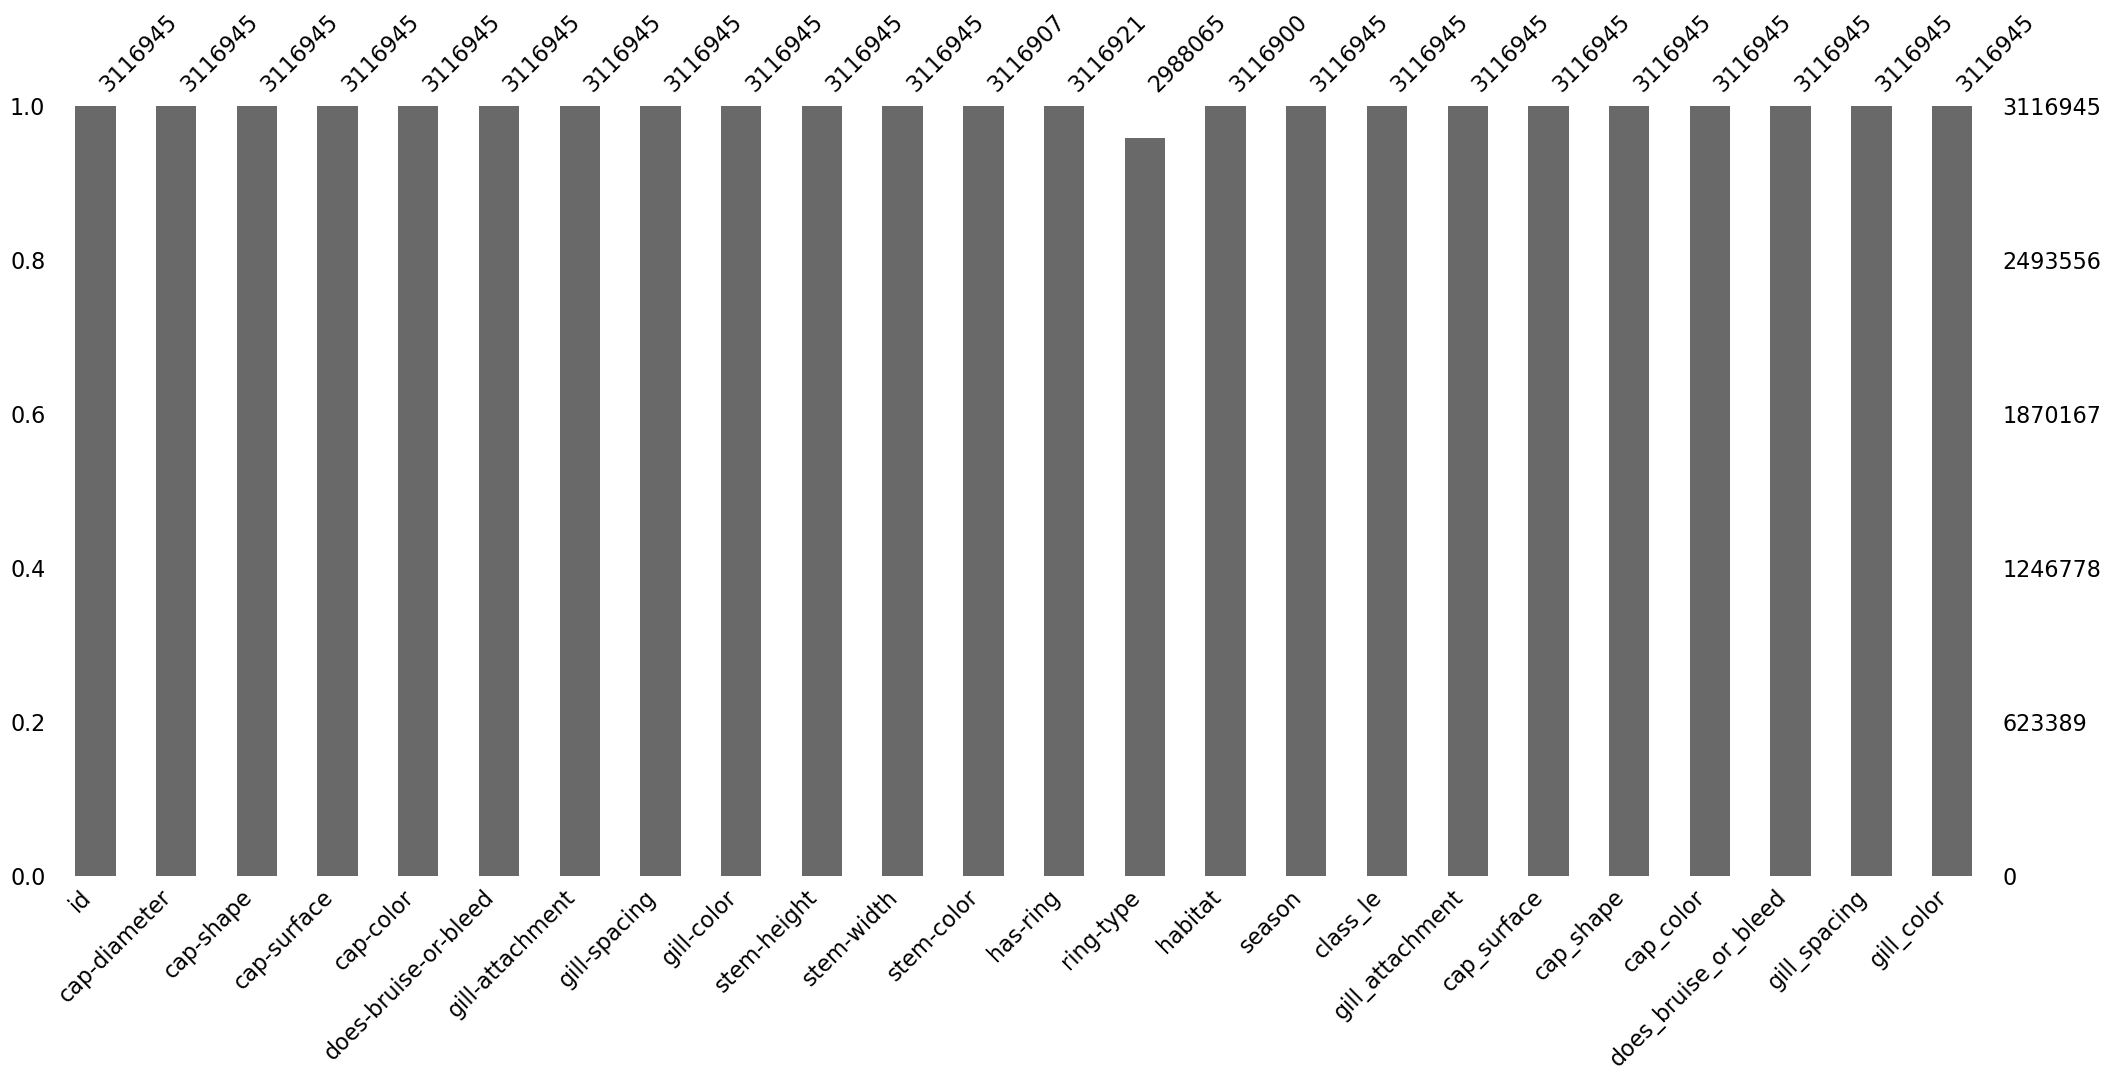

In [71]:
msno.bar(df4)

In [72]:
df4['stem-color'].unique()

array(['w', 'o', 'n', 'y', 'e', 'u', 'p', 'f', 'g', 'r', 'k', 'l', 'b',
       '3.13', 't', 'z', 'a', 'h', 'd', nan, 's', '7.33', 'is n', 'i',
       'c', 'x', 'e n', '1.75', 'm', '33.52', 'ring-type', '2.78',
       'spore-print-color', '23.59', '8.32', 'is w', '26.4', '4.75',
       '7.84', 'class', '2.75', '8.49', '4.49', '1.41', '17.45', '3.53',
       '12.92', '3.98', '20.07', '7.7', '22.6', '6.31', '6.09', '3.56',
       '3.37', '4.62', '2.54', '39.51', '18.06', '4.33'], dtype=object)

In [73]:
stats_s_c = df4.groupby(['stem-color'], as_index = False)[['id']].count()
stats_s_c = stats_s_c.rename(columns = {'id': 'count'})
stats_s_c.sort_values(by = 'count', ascending=False)

,stem-color,count
55,w,1196637
46,n,1003464
57,y,373971
38,g,132019
47,o,111541
35,e,103373
54,u,67017
48,p,54690
43,k,33676
49,r,22329


<Axes: xlabel='stem-color', ylabel='count'>

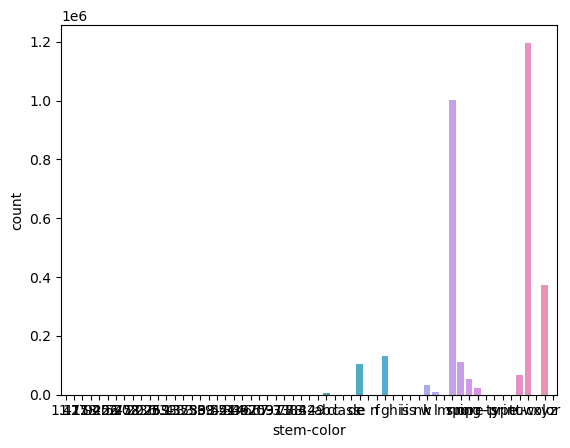

In [74]:
sns.barplot(stats_s_c, x = 'stem-color', y = 'count')

In [75]:
df4['stem-color'] = df4['stem-color'].fillna('w')

In [76]:
def stem_color(df):
    df4['stem_color'] = 'w'
    
    stem_c = ['w', 'y', 'n', 'e', 'f', 'b', 'g', 'p', 'o', 'u', 'k', 'r', 'l',
              'd', 'm', 't', 's', 'a', 'x', 'c', 'i', 'h', 'z']
    for stemc in  stem_c:
        df4.loc[df4['stem-color'] == stemc, 'stem_color'] = stemc
    return df

In [77]:
stem_color(df4)

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,season,class_le,gill_attachment,cap_surface,cap_shape,cap_color,does_bruise_or_bleed,gill_spacing,gill_color,stem_color
0,0,8.80,f,s,u,f,a,c,w,4.51,...,a,0,a,s,f,u,f,c,w,w
1,1,4.51,x,h,o,f,a,c,n,4.79,...,w,1,a,h,x,o,f,c,n,o
2,2,6.94,f,s,b,f,x,c,w,6.85,...,w,0,x,s,f,b,f,c,w,n
3,3,3.88,f,y,g,f,s,c,g,4.16,...,u,0,s,y,f,g,f,c,g,w
4,4,5.85,x,l,w,f,d,c,w,3.37,...,a,0,d,l,x,w,f,c,w,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,9.29,f,t,n,t,a,c,w,12.14,...,u,0,a,t,f,n,t,c,w,w
3116941,3116941,10.88,s,t,w,t,d,c,p,6.65,...,u,0,d,t,s,w,t,c,p,w
3116942,3116942,7.82,x,e,e,f,a,c,w,9.51,...,a,1,a,e,x,e,f,c,w,y
3116943,3116943,9.45,p,i,n,t,e,c,p,9.13,...,u,0,e,i,p,n,t,c,p,w


In [78]:
df4['stem_color'].unique()

array(['w', 'o', 'n', 'y', 'e', 'u', 'p', 'f', 'g', 'r', 'k', 'l', 'b',
       't', 'z', 'a', 'h', 'd', 's', 'i', 'c', 'x', 'm'], dtype=object)

In [79]:
df5 = df4.drop(columns =['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed','gill-attachment',
                          'gill-spacing','gill-color', 'stem-color'])

In [80]:
df5.shape

(3116945, 17)

In [81]:
df5['has-ring'].unique()

array(['f', 't', 'h', 'r', 'y', 'c', 'e', 'g', 'l', 's', nan, 'p', 'x',
       'k', 'z', 'f has-ring', 'd', 'o', 'n', 'm', 'i', '10.3', 'w', 'a'],
      dtype=object)

In [82]:
stats_hs = df5.groupby(['has-ring'], as_index = False)[['id']].count()
stats_hs = stats_hs.rename(columns = {'id': 'count'})
stats_hs.sort_values(by = 'count', ascending=False)

,has-ring,count
5,f,2368820
18,t,747982
16,r,16
8,h,13
11,l,11
15,p,11
2,c,11
17,s,11
7,g,8
22,z,6


<Axes: xlabel='has-ring', ylabel='count'>

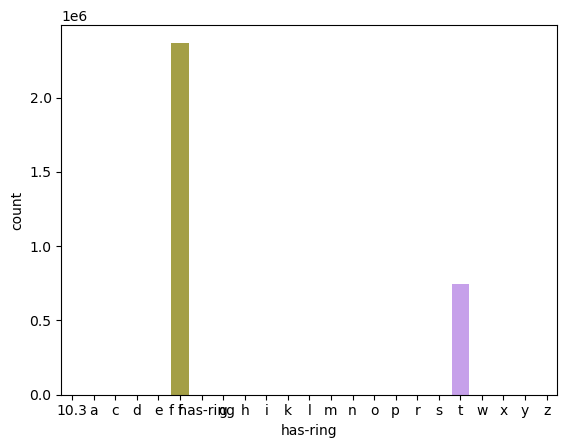

In [83]:
sns.barplot(stats_hs, x = 'has-ring', y = 'count')

In [84]:
df5['has-ring'] = df5['has-ring'].fillna('f')

In [85]:
def has_ring(df):
    df5['has_ring'] = 'f'
    
    has_r = ['t', 'f', 'u', 'a', 'c', 'l', 'g', 'i', 'm', 'p', 'r', 'x',
              'y', 'd', 'e', 'z', 'k', 'o', 'h', 'b', 's', 'w',]
    for ring in  has_r:
        df5.loc[df5['has-ring'] == ring, 'has_ring'] = ring
    return df

In [86]:
has_ring(df5)

,id,cap-diameter,stem-height,stem-width,has-ring,ring-type,habitat,season,class_le,gill_attachment,cap_surface,cap_shape,cap_color,does_bruise_or_bleed,gill_spacing,gill_color,stem_color,has_ring
0,0,8.80,4.51,15.39,f,f,d,a,0,a,s,f,u,f,c,w,w,f
1,1,4.51,4.79,6.48,t,z,d,w,1,a,h,x,o,f,c,n,o,t
2,2,6.94,6.85,9.93,f,f,l,w,0,x,s,f,b,f,c,w,n,f
3,3,3.88,4.16,6.53,f,f,d,u,0,s,y,f,g,f,c,g,w,f
4,4,5.85,3.37,8.36,f,f,g,a,0,d,l,x,w,f,c,w,w,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,9.29,12.14,18.81,t,g,d,u,0,a,t,f,n,t,c,w,w,t
3116941,3116941,10.88,6.65,26.97,f,f,d,u,0,d,t,s,w,t,c,p,w,f
3116942,3116942,7.82,9.51,11.06,t,z,d,a,1,a,e,x,e,f,c,w,y,t
3116943,3116943,9.45,9.13,17.77,t,p,d,u,0,e,i,p,n,t,c,p,w,t


In [87]:
df5['has-ring'].unique()

array(['f', 't', 'h', 'r', 'y', 'c', 'e', 'g', 'l', 's', 'p', 'x', 'k',
       'z', 'f has-ring', 'd', 'o', 'n', 'm', 'i', '10.3', 'w', 'a'],
      dtype=object)

In [88]:
stats_rt = df5.groupby(['ring-type'], as_index =False)[['id']].count()
stats_rt = stats_rt.rename(columns = {'id': 'count'})
stats_rt.sort_values(by = 'count', ascending=False)

,ring-type,count
18,f,2477170
17,e,120006
39,z,113780
23,l,73443
28,r,67909
27,p,67678
19,g,63687
24,m,3992
34,t,98
14,d,37


In [89]:
df5['ring-type'] = df5['ring-type'].fillna('f')

In [90]:
df5['ring-type'].unique()

array(['f', 'z', 'e', 'p', 'l', 'g', 'r', 'm', 'y', 'h', 'o', 't',
       'ring-type', 'a', 'd', 's', 'x', '4', 'b', '15', 'u', 'n', 'w',
       'does f', '3.12', 'i', 'season', 'k', 'c', 'does-bruise-or-bleed',
       '11', '23.6', '1', '14', '2', 'spore-print-color', 'class', 'sp',
       '2.87', '8.25'], dtype=object)

In [91]:
def ring_type(df):
    df5['ring_type'] = 'f'
    
    has_r = ['g', 'f', 'z', 'r', 'e', 'l', 'p', 'm', 'd', 'n', 'u', 's',
             'k', 't', 'a', 'y', 'o', 'c', 'w', 'x', 'b', 'h', 'i']
    for ring in  has_r:
        df5.loc[df5['ring-type'] == ring, 'ring_type'] = ring
    return df

In [92]:
ring_type(df5)

,id,cap-diameter,stem-height,stem-width,has-ring,ring-type,habitat,season,class_le,gill_attachment,cap_surface,cap_shape,cap_color,does_bruise_or_bleed,gill_spacing,gill_color,stem_color,has_ring,ring_type
0,0,8.80,4.51,15.39,f,f,d,a,0,a,s,f,u,f,c,w,w,f,f
1,1,4.51,4.79,6.48,t,z,d,w,1,a,h,x,o,f,c,n,o,t,z
2,2,6.94,6.85,9.93,f,f,l,w,0,x,s,f,b,f,c,w,n,f,f
3,3,3.88,4.16,6.53,f,f,d,u,0,s,y,f,g,f,c,g,w,f,f
4,4,5.85,3.37,8.36,f,f,g,a,0,d,l,x,w,f,c,w,w,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,9.29,12.14,18.81,t,g,d,u,0,a,t,f,n,t,c,w,w,t,g
3116941,3116941,10.88,6.65,26.97,f,f,d,u,0,d,t,s,w,t,c,p,w,f,f
3116942,3116942,7.82,9.51,11.06,t,z,d,a,1,a,e,x,e,f,c,w,y,t,z
3116943,3116943,9.45,9.13,17.77,t,p,d,u,0,e,i,p,n,t,c,p,w,t,p


In [93]:
df5['ring_type'].unique()

array(['f', 'z', 'e', 'p', 'l', 'g', 'r', 'm', 'y', 'h', 'o', 't', 'a',
       'd', 's', 'x', 'b', 'u', 'n', 'w', 'i', 'k', 'c'], dtype=object)

In [94]:
stats_hb = df5.groupby(['habitat'], as_index =False)[['id']].count()
stats_hb = stats_hb.rename(columns = {'id': 'count'})
stats_hb.sort_values(by = 'count', ascending=False)

,habitat,count
25,d,2177573
29,g,454908
36,l,171892
37,m,150969
30,h,120137
48,w,18530
40,p,17180
46,u,5264
27,e,55
43,s,52


In [95]:
df5['habitat'] = df5['habitat'].fillna('d')

In [96]:
df5['habitat'].unique()

array(['d', 'l', 'g', 'h', 'p', 'm', 'u', 'w', 'y', 'n', 'a', 's', 'k',
       'habitat', 'z', '8.09', '17.1', 'b', 't', 'c', '9.28', 'ring-type',
       'e', 'r', 'does-bruise-or-bleed', 'f', 'is w', 'o', '2.94', 'x',
       '4', 'is h', '5.56', 'class', 'i', '10.07', '7.31', '5.62',
       'spore-print-color', 'cap-diameter', '3.11', '16.46', '7.37',
       'veil-type', '17.38', '1.66', '6.63', '18.35', '6.75', '2.44',
       '3.68', '2.25'], dtype=object)

In [97]:
def habitat(df):
    df5['habitat_c'] = 'd'
    
    hab_l = ['d', 'p', 'u', 'g', 'h', 'm', 'l', 'w', 's', 't', 'k', 'n', 'x', 'o', 'e', 'a', 'c', 'b',
             'y', 'r', 'f', 'i', 'z']
    for hab in  hab_l:
        df5.loc[df5['habitat'] == hab, 'habitat_c'] = hab
    return df

In [98]:
habitat(df5)

,id,cap-diameter,stem-height,stem-width,has-ring,ring-type,habitat,season,class_le,gill_attachment,cap_surface,cap_shape,cap_color,does_bruise_or_bleed,gill_spacing,gill_color,stem_color,has_ring,ring_type,habitat_c
0,0,8.80,4.51,15.39,f,f,d,a,0,a,s,f,u,f,c,w,w,f,f,d
1,1,4.51,4.79,6.48,t,z,d,w,1,a,h,x,o,f,c,n,o,t,z,d
2,2,6.94,6.85,9.93,f,f,l,w,0,x,s,f,b,f,c,w,n,f,f,l
3,3,3.88,4.16,6.53,f,f,d,u,0,s,y,f,g,f,c,g,w,f,f,d
4,4,5.85,3.37,8.36,f,f,g,a,0,d,l,x,w,f,c,w,w,f,f,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,9.29,12.14,18.81,t,g,d,u,0,a,t,f,n,t,c,w,w,t,g,d
3116941,3116941,10.88,6.65,26.97,f,f,d,u,0,d,t,s,w,t,c,p,w,f,f,d
3116942,3116942,7.82,9.51,11.06,t,z,d,a,1,a,e,x,e,f,c,w,y,t,z,d
3116943,3116943,9.45,9.13,17.77,t,p,d,u,0,e,i,p,n,t,c,p,w,t,p,d


In [99]:
df5['habitat_c'].unique()

array(['d', 'l', 'g', 'h', 'p', 'm', 'u', 'w', 'y', 'n', 'a', 's', 'k',
       'z', 'b', 't', 'c', 'e', 'r', 'f', 'o', 'x', 'i'], dtype=object)

In [100]:
df5['season'].unique()

array(['a', 'w', 'u', 's'], dtype=object)

In [101]:
df5['stem-height'].max()

88.72

In [102]:
df5['stem-height'] = df5['stem-height'].fillna(df['stem-height'].mean())

In [103]:
df5.groupby(['stem-height'], as_index = False)[['id']].count()

,stem-height,id
0,0.00,554
1,0.74,1
2,0.77,1
3,0.91,1
4,0.93,1
...,...,...
2744,53.82,1
2745,53.87,1
2746,53.93,1
2747,57.22,1


In [104]:
df6 = df5.drop(columns = ['has-ring', 'ring-type', 'habitat'])

In [105]:
df6.isnull().sum()

id                      0
cap-diameter            0
stem-height             0
stem-width              0
season                  0
class_le                0
gill_attachment         0
cap_surface             0
cap_shape               0
cap_color               0
does_bruise_or_bleed    0
gill_spacing            0
gill_color              0
stem_color              0
has_ring                0
ring_type               0
habitat_c               0
dtype: int64

In [106]:
df6 = df6.drop(columns = ['id'])

In [107]:
df6.head()

,cap-diameter,stem-height,stem-width,season,class_le,gill_attachment,cap_surface,cap_shape,cap_color,does_bruise_or_bleed,gill_spacing,gill_color,stem_color,has_ring,ring_type,habitat_c
0,8.80,4.51,15.39,a,0,a,s,f,u,f,c,w,w,f,f,d
1,4.51,4.79,6.48,w,1,a,h,x,o,f,c,n,o,t,z,d
2,6.94,6.85,9.93,w,0,x,s,f,b,f,c,w,n,f,f,l
3,3.88,4.16,6.53,u,0,s,y,f,g,f,c,g,w,f,f,d
4,5.85,3.37,8.36,a,0,d,l,x,w,f,c,w,w,f,f,g


In [108]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   cap-diameter          float64
 1   stem-height           float64
 2   stem-width            float64
 3   season                object 
 4   class_le              int64  
 5   gill_attachment       object 
 6   cap_surface           object 
 7   cap_shape             object 
 8   cap_color             object 
 9   does_bruise_or_bleed  object 
 10  gill_spacing          object 
 11  gill_color            object 
 12  stem_color            object 
 13  has_ring              object 
 14  ring_type             object 
 15  habitat_c             object 
dtypes: float64(3), int64(1), object(12)
memory usage: 380.5+ MB


In [109]:
df6_train, df6_test = train_test_split(df6, test_size = .3, random_state = 42)

In [110]:
df6_train.head()

,cap-diameter,stem-height,stem-width,season,class_le,gill_attachment,cap_surface,cap_shape,cap_color,does_bruise_or_bleed,gill_spacing,gill_color,stem_color,has_ring,ring_type,habitat_c
222750,1.97,5.88,2.64,s,1,a,g,b,n,f,c,n,n,f,f,d
1417407,1.56,5.29,1.70,u,0,a,g,c,n,f,c,g,g,f,f,l
591229,0.67,3.73,0.93,a,1,a,g,x,n,f,c,n,k,f,f,d
229407,7.06,5.63,8.83,u,1,s,t,x,n,f,c,n,n,f,f,d
2470459,3.83,6.58,4.65,a,1,a,y,b,n,f,c,g,w,f,f,d


In [111]:
df6_train.shape

(2181861, 16)

In [129]:
def fit():
    X = df6_train.drop('class_le', axis = 1)
    y = df6_train['class_le']
    
    numerical_features = sklearn.compose.make_column_selector(dtype_include=['int64', 'float64'])
    categorical_features = sklearn.compose.make_column_selector(dtype_include=['object'])
    
    numerical_transform = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
        
    categorical_transform = Pipeline(steps=[
        ('encoder', BinaryEncoder())
    ])
    
    column_transforms = ColumnTransformer(transformers = [
        ('numerical', numerical_transform, numerical_features),
        ('categorical', categorical_transform, categorical_features)
    ])
    
    preprocessor = Pipeline(steps=[
        ('column_transforms', column_transforms)
    ])
    
    models = [
        LogisticRegression(solver = 'liblinear', penalty = 'l2'),
        RandomForestClassifier(max_depth = 200),
        HistGradientBoostingClassifier(),
        XGBClassifier()
    ]
    
    best_score = .0
    best_pipe = None
    for model in models:
        pipe = Pipeline(steps = [
            ('prepocessor', preprocessor),
            ('models', model)
        ])
        
        score = cross_val_score(pipe, X, y, cv = 5, scoring = 'roc_auc')
        print(f'model: {type(model).__name__}, roc_auc: {score.mean():.4f}')
        
        if score.mean() > best_score:
            best_score =score.mean()
            best_pipe = pipe
    
    best_pipe.fit(X, y)
    with open('mushrooms-1.pkl', 'wb') as file:
        pickle.dump(best_pipe, file)

In [130]:
fit()

model: LogisticRegression, roc_auc: 0.7640
model: RandomForestClassifier, roc_auc: 0.9957
model: HistGradientBoostingClassifier, roc_auc: 0.9953
model: XGBClassifier, roc_auc: 0.9964
